<a href="https://colab.research.google.com/github/srijayadla66/Housepricepredictionmodel/blob/main/Housepricepredictionmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
train_file_path = 'train.csv'
test_file_path = 'test.csv'
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

In [5]:
print("Training Data Head:")
print(train_data.head())


Training Data Head:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0

In [6]:
print("\nTesting Data Head:")
print(test_data.head())



Testing Data Head:
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleConditio

In [7]:
print("\nMissing values in training data:")
print(train_data.isnull().sum().sort_values(ascending=False).head(20))


Missing values in training data:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64


In [8]:
print("\nMissing values in testing data:")
print(test_data.isnull().sum().sort_values(ascending=False).head(20))


Missing values in testing data:
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
dtype: int64


In [9]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

In [10]:
train_data = train_data[features + [target]].dropna()
test_data = test_data[features].fillna(test_data[features].mean())

In [11]:
X = train_data[features]
y = train_data[target]

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_val_pred = model.predict(X_val)

In [15]:
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)

In [16]:
print(f"\nValidation Mean Squared Error (MSE): {mse_val}")
print(f"Validation Mean Absolute Error (MAE): {mae_val}")
print(f"Validation R-squared (R²): {r2_val}")
print(f"Validation Root Mean Squared Error (RMSE): {rmse_val}")


Validation Mean Squared Error (MSE): 2806426667.247853
Validation Mean Absolute Error (MAE): 35788.061292436294
Validation R-squared (R²): 0.6341189942328371
Validation Root Mean Squared Error (RMSE): 52975.71771338122


In [17]:
test_preds = model.predict(test_data)

In [18]:
submission = pd.DataFrame({
    'Id': test_data.index + 1,
    'SalePrice': test_preds
})

In [19]:
submission_file_path = 'submission.csv'
submission.to_csv(submission_file_path, index=False)

In [20]:
print(f"\nSubmission file saved to: {submission_file_path}")


Submission file saved to: submission.csv


In [21]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

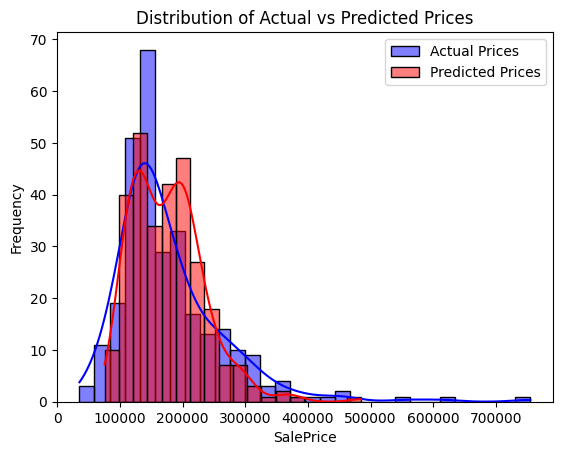

In [22]:
sns.histplot(y_val, color='blue', label='Actual Prices', kde=True)
sns.histplot(y_val_pred, color='red', label='Predicted Prices', kde=True)
plt.title('Distribution of Actual vs Predicted Prices')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.legend()
plt.show()


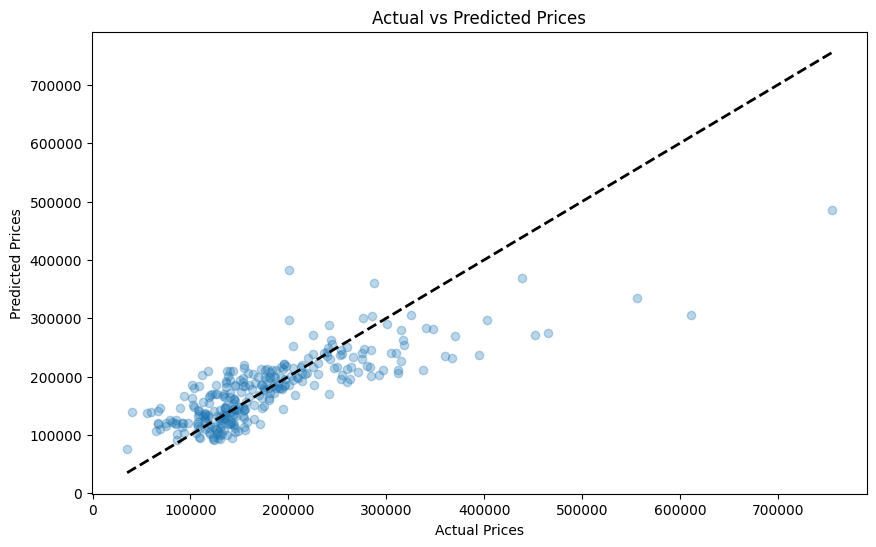

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.3)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()